# Machine Learning with Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np


## 1.3 Dimensionality Reduction

Dimensionality reduction is a commonly used unsupervised technique to produce low-dimensional projections of data for visualisation, or to reduce the number of features supplied to a machine learning method. It can also be applied to de-noise data.


## Linear approach: [PCA](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca)

Principal Component Analysis is the most well-known type of dimensionality reduction. It finds a series of orthogonal directions in the high-dimensional data space, __ordered by their contribution to the variance.__ By taking only the first few principal components, we can reduce dimensionality whilst preserving as much of the variation as possible.

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

print(cancer.keys())

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1
)
print(X_train.shape)
print(X_test.shape)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(426, 30)
(143, 30)


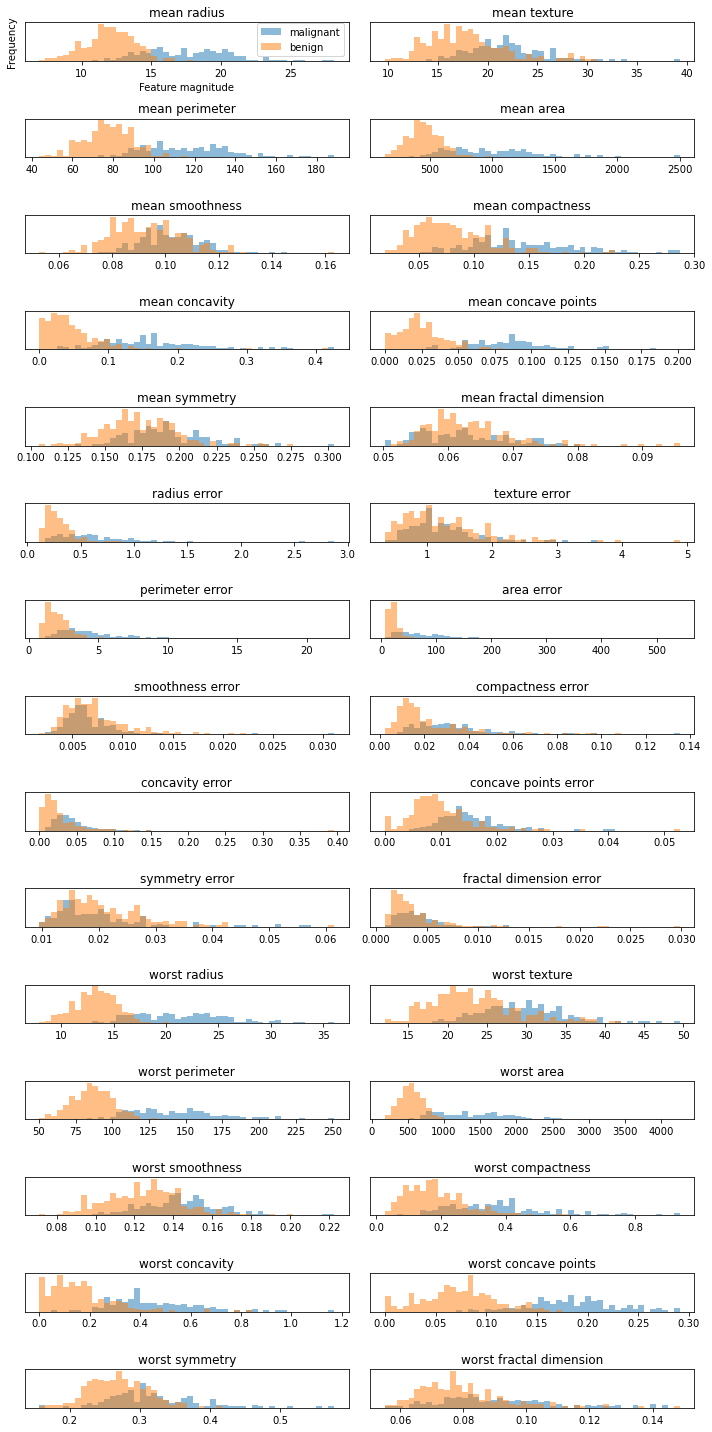

In [4]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = X_train[y_train == 0]
benign = X_train[y_train == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(X_train[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


In [5]:
from sklearn.preprocessing import StandardScaler

# make a new Scaler object
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)


In [6]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (426, 30)
Reduced shape: (426, 2)


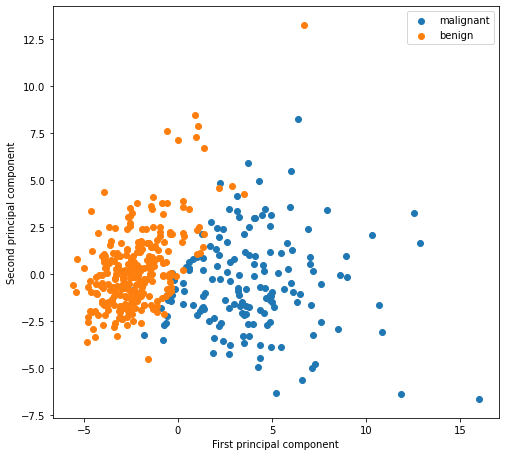

In [7]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(
    X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], label=cancer.target_names[0]
)
plt.scatter(
    X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], label=cancer.target_names[1]
)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()


Let's see what happens without the scaling step:

In [8]:
# keep the first two principal components of the data
pca2 = PCA(n_components=2)

# fit PCA model to breast cancer data
pca2.fit(X_train)

# transform data onto the first two principal components
X_pca2 = pca2.transform(X_train)


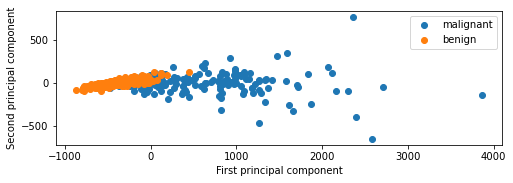

In [9]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(
    X_pca2[y_train == 0, 0], X_pca2[y_train == 0, 1], label=cancer.target_names[0]
)
plt.scatter(
    X_pca2[y_train == 1, 0], X_pca2[y_train == 1, 1], label=cancer.target_names[1]
)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()


## Non-linear approach: [t-SNE](https://scikit-learn.org/stable/modules/manifold.html#t-distributed-stochastic-neighbor-embedding-t-sne)

t-SNE is an example of a [manifold learning](https://scikit-learn.org/stable/modules/manifold.html) algorithm. These are non-linear dimensionality reduction procedures that model the data as a lower-dimensional *manifold* embedded in a higher-dimensional space. They can often provide useful data representations for visualisation.

An excellent discussion of t-SNE is given here:
https://distill.pub/2016/misread-tsne/

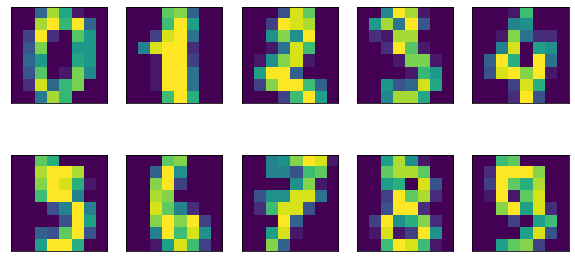

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={"xticks": (), "yticks": ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)


Text(0, 0.5, 'Second principal component')

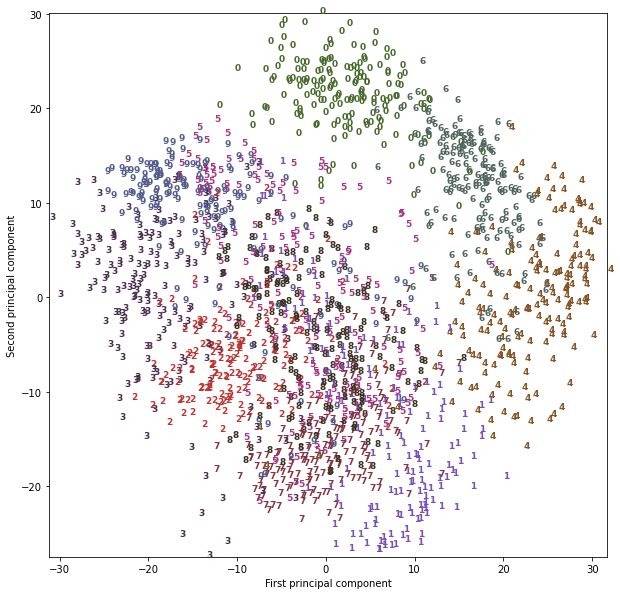

In [11]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = [
    "#476A2A",
    "#7851B8",
    "#BD3430",
    "#4A2D4E",
    "#875525",
    "#A83683",
    "#4E655E",
    "#853541",
    "#3A3120",
    "#535D8E",
]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(
        digits_pca[i, 0],
        digits_pca[i, 1],
        str(digits.target[i]),
        color=colors[digits.target[i]],
        fontdict={"weight": "bold", "size": 9},
    )
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [12]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)


/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0, 0.5, 't-SNE feature 1')

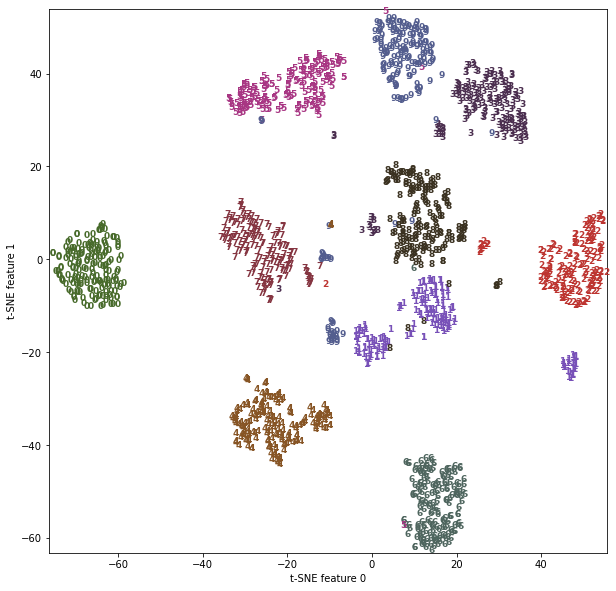

In [13]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(
        digits_tsne[i, 0],
        digits_tsne[i, 1],
        str(digits.target[i]),
        color=colors[digits.target[i]],
        fontdict={"weight": "bold", "size": 9},
    )
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")


### Exercise

Use PCA to visualise the `wine` dataset. 

In [14]:
from sklearn.datasets import load_wine

wine = load_wine()

In [25]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [27]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [26]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, random_state=1
)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)


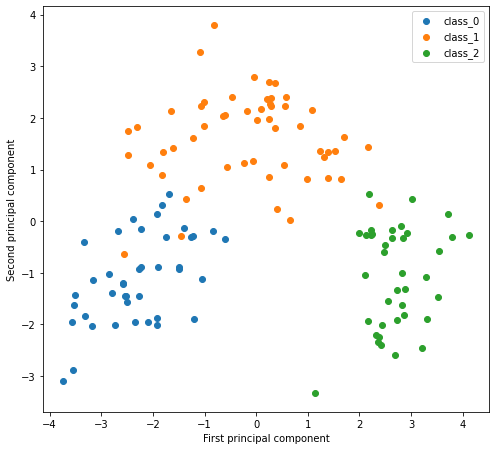

In [36]:
plt.figure(figsize=(8, 8))
plt.scatter(
    X_pca[y_train == 0, 0], X_pca[y_train == 0, 1], label=wine.target_names[0]
)
plt.scatter(
    X_pca[y_train == 1, 0], X_pca[y_train == 1, 1], label=wine.target_names[1]
)
plt.scatter(
    X_pca[y_train == 2, 0], X_pca[y_train == 2, 1], label=wine.target_names[2]
)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

How does standardisation of the data affect the PCA result?

In [37]:
pca_unscaled = PCA(n_components=2)
pca_unscaled.fit(X_train)

X_pca_unscaled = pca_unscaled.transform(X_train)

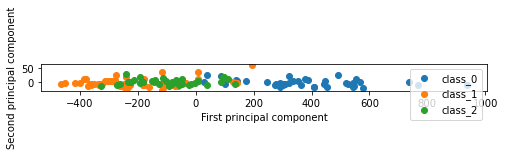

In [38]:
plt.figure(figsize=(8, 8))
plt.scatter(
    X_pca_unscaled[y_train == 0, 0], X_pca_unscaled[y_train == 0, 1], label=wine.target_names[0]
)
plt.scatter(
    X_pca_unscaled[y_train == 1, 0], X_pca_unscaled[y_train == 1, 1], label=wine.target_names[1]
)
plt.scatter(
    X_pca_unscaled[y_train == 2, 0], X_pca_unscaled[y_train == 2, 1], label=wine.target_names[2]
)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
plt.show()

Compare your PCA result with a t-SNE visualisation.

In [41]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaled)


/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


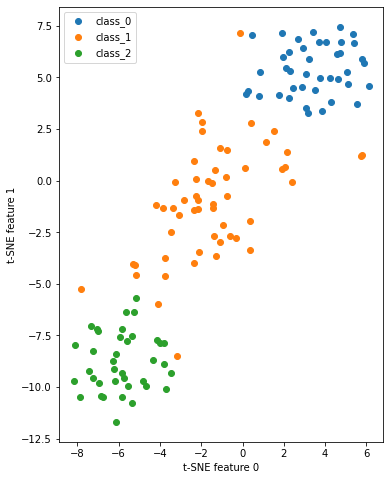

In [44]:
plt.figure(figsize=(8, 8))
plt.scatter(
    X_tsne[y_train == 0, 0], X_tsne[y_train == 0, 1], label=wine.target_names[0]
)
plt.scatter(
    X_tsne[y_train == 1, 0], X_tsne[y_train == 1, 1], label=wine.target_names[1]
)
plt.scatter(
    X_tsne[y_train == 2, 0], X_tsne[y_train == 2, 1], label=wine.target_names[2]
)
plt.gca().set_aspect("equal")
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.legend()
plt.show()